In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os 
import matplotlib.pyplot as plt
import nibabel as nib
from tqdm import tqdm

from datasets import TrainPatchesDataset, HealthyMRIDataset, PathologicalMRIDataset
from visualization_utils import ImageSliceViewer3D

In [27]:
len(os.listdir("../data/train_patches_v2/labels"))

152

In [82]:
train_patches = TrainPatchesDataset('../data/train_patches_v3')

In [86]:
len(train_patches)

169

In [7]:
ImageSliceViewer3D(train_patches[45]['patch'], train_patches[45]['mask'], cmap='gray', mask_intensity=0.2)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [4]:
train_patches[0]['flair'].shape

(40, 40, 40)

In [11]:
train_patches[0]['filename']

'sub-G294.nii.gz'

In [11]:
healthy_mri = np.load('../data/healthy_mri/healthy_brains.npy')
healthy_mri.shape

(36, 197, 233, 189)

In [12]:
healthy_mri_norm = np.load('../data/healthy_mri/healthy_brains_norm.npy')
healthy_mri_norm.shape

(24, 197, 233, 189)

In [13]:
healthy_mri = HealthyMRIDataset(mri_path='../data/healthy_mri/healthy_mri')

In [15]:
len(healthy_mri)

60

In [2]:
pathological_mri = PathologicalMRIDataset('../data/pathological_mri')
len(pathological_mri)

198

In [27]:
mri, mask = pathological_mri[11]['mri'], pathological_mri[11]['mask']

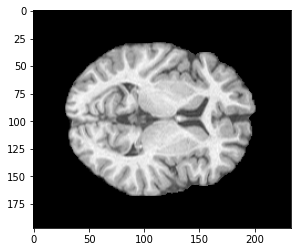

In [29]:
plt.imshow(mri[:, :, 80], cmap='gray')

In [25]:
ImageSliceViewer3D(mri, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [31]:
ImageSliceViewer3D(mri, mask, cmap='gray', mask_intensity=0.2)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [6]:
pathological_mri[-1]

{'mri': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0.

In [1]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('/workspace/MRI-inpainting-project/I2SB')
from logger import Logger
from dataset.imagenet import build_lmdb_dataset
from my_sample import build_val_dataset
from dataset.mri_datasets import TrainPatchesDatasetI2SB, TrainPatchesDataset, HealthyPatchesDatasetI2SB, HealthyMRIDataset
import numpy as np
from torchvision import transforms
from tqdm import tqdm
import torch

from visualization_utils import ImageSliceViewer3D

from PIL import Image

SyntaxError: invalid syntax (mri_datasets.py, line 9)

In [19]:
class Opt:
    def __init__(self):
        self.image_size = 256
        self.dataset_dir = '/workspace/MRI-inpainting-project/I2SB/data/zwerg_data'

In [20]:
opt = Opt()
opt.image_size, opt.dataset_dir

(256, '/workspace/MRI-inpainting-project/I2SB/data/zwerg_data')

In [21]:
log = None

In [25]:
dataset = build_lmdb_dataset(opt=opt, log=log, train=True, transform=None)

In [8]:
dataset[0][0].shape

torch.Size([3, 256, 256])

mask dim (1, 256, 256)

In [13]:
my_dataset = TrainPatchesDatasetI2SB('/workspace/MRI-inpainting-project/data/train_patches_v3')

In [11]:
my_dataset[0][0].shape

torch.Size([3, 256, 256])

In [14]:
len(my_dataset)

6760

(array([30750.,  2916.,  4476.,  7875., 13044., 31986., 62559., 25341.,
        17157.,   504.]),
 array([-1.        , -0.92347605, -0.84695209, -0.77042814, -0.69390419,
        -0.61738023, -0.54085628, -0.46433233, -0.38780837, -0.31128442,
        -0.23476047]),
 <BarContainer object of 10 artists>)

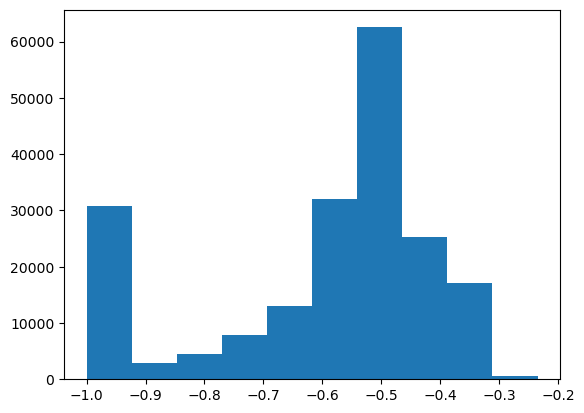

In [12]:
plt.hist(my_dataset[2][0].flatten())

In [20]:
max_vals = []
for patch, _, _ in my_dataset:
    max_vals.append(patch.max().item())

In [23]:
np.max(max_vals)

1432.7580817341805

(array([  68.,    7., 1693., 3871.,  215.,  128.,   52.,   19.,   14.,
          13.]),
 array([   0.        ,  143.27580817,  286.55161635,  429.82742452,
         573.10323269,  716.37904087,  859.65484904, 1002.93065721,
        1146.20646539, 1289.48227356, 1432.75808173]),
 <BarContainer object of 10 artists>)

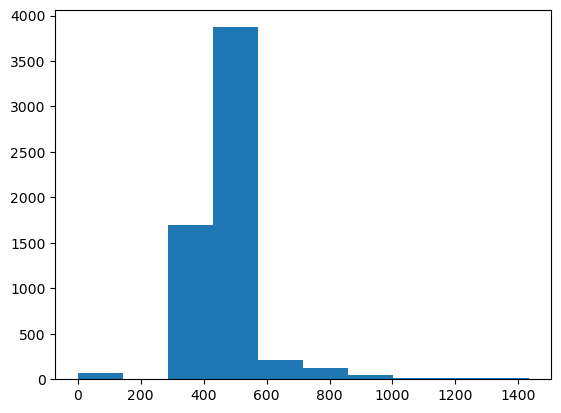

In [21]:
plt.hist(max_vals)

check mask type

In [8]:
len(os.listdir('../data/train_patches_v2/opposite'))

152

In [27]:
my_dataset = TrainPatchesDatasetI2SB('/workspace/MRI-inpainting-project/data/train_patches_v3', 
                                     split_id=0, splits_filename='stratified_8_cv_all.npy')

In [16]:
len(my_dataset)

5880

In [3]:
good = 0
for sample in tqdm(my_dataset):
    good += 1

if good == 5880:
    print('good')

100%|██████████| 5880/5880 [00:59<00:00, 99.07it/s] 

good


In [4]:
good

5880

разбиения на трейн-тест фолды. попробовать обучить

In [30]:
good // 40

4

In [35]:
split_table = np.load('/workspace/MRI-inpainting-project/data/train_patches_v3/stratified_8_cv_all.npy', allow_pickle=True)

In [44]:
split_table[0]

{'train': array(['9', '93', '33', '48', '53', '46', '43', '49', '36', 'n3', 'n69',
        'G324', 'n68', 'n35', 'G015', 'n13', 'n88', 'n50', 'n82', 'n41',
        '37', '42', '17', '29', '95NS', '65NS', '10', '90', '76', 'n75',
        'G177', 'n61', 'n18', 'n37', 'n54', 'n42', 'n19', 'n22', 'n83',
        'n25', '88NS', '30', '60', '19', '16', '8', '59', '3', '58', 'n11',
        'n79', 'n5', 'G061', 'n31', 'n73', 'n62', 'n43', 'n78', 'n56',
        'n65', 'n59', '32', '35', '44', '11', '41', '62NS', '50', '77NS',
        '97', 'n26', 'n67', 'G409', 'n66', 'n70', 'G180', 'n77', 'n64',
        'G368', 'n55', 'n20', 'n32', '25', '98', '54', '83', '18', '1',
        '70NS', '5', '2', 'n58', 'n47', 'n57', 'n46', 'n39', 'G256',
        'G044', 'n36', 'n23', 'n34', 'n51', 'G081', '22', '84', '45', '82',
        '80NS', '20', '27', '86NS', '57', '51', 'n12', 'G184', 'n60', 'n7',
        'G371', 'n72', 'n45', 'n9', 'n21', 'G294', 'n71', 'G417', '52',
        '55', '13', '40', '21', '28', '81

In [32]:
for filename in os.listdir('/workspace/MRI-inpainting-project/data/healthy_mri_C_00'):
    if 'sub' in filename:
        !rm {"/workspace/MRI-inpainting-project/data/healthy_mri_C_00/" + filename}

In [3]:
healthy_patches_dataset = HealthyPatchesDatasetI2SB('/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_mri_flair',
                                                   '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/sphere_masks/masks',
                                                   '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/sphere_masks/patch_masks', flair=True)

In [4]:
len(healthy_patches_dataset)

1232

In [5]:
healthy_patches_dataset[0][0].max()

tensor(-0.2818)

In [16]:
16 * 77

1232

In [6]:
healthy_dataset = HealthyMRIDataset('/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_mri_t1',
                                    '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/sphere_masks/masks')

In [7]:
healthy_dataset[0]['mask'].shape

(197, 233, 189)

In [25]:
np.all(healthy_patches_dataset[1][:, :, 20][27:, :] == 0)

False

0: 0-11, 28:40

In [26]:
27 - 12 + 1

16

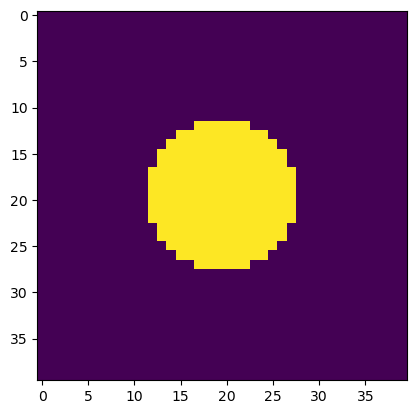

In [16]:
plt.imshow(healthy_patches_dataset[1][:, :, 20])

In [13]:
os.path.isfile('/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/sphere_masks/patch_masks/sub-00106_t1_brain-final-patch-mask.nii.gz')

True

In [2]:
flair_dataset = HealthyMRIDataset('/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_mri_flair',
                                  '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/sphere_masks/masks')

In [21]:
maxs = []

for sample in flair_dataset:
    maxs.append(sample['mri'].max())

In [23]:
np.max(maxs)

398.22265625

In [21]:
ImageSliceViewer3D(flair_dataset[3]['mri'], flair_dataset[3]['mask'], cmap='gray', mask_intensity=0.2)

NameError: name 'flair_dataset' is not defined

In [3]:
pathological_mri = PathologicalMRIDataset('../data/pathological_mri')

In [45]:
len(pathological_mri)

198

In [51]:
mean_intensity = []

for sample in tqdm(pathological_mri):
    mri, brain_mask = sample['mri'], sample['brain_mask']
    mean_intensity.append(mri[brain_mask > 0.5].mean())

100%|██████████| 198/198 [01:44<00:00,  1.89it/s]


In [53]:
mean_fcd_intensity = []

for sample in tqdm(pathological_mri):
    mri, mask = sample['mri'], sample['mask']
    mean_fcd_intensity.append(mri[mask > 0.5].mean())

100%|██████████| 198/198 [01:42<00:00,  1.94it/s]


(array([ 5.,  6., 19., 31., 33., 33., 28., 31.,  7.,  5.]),
 array([231.48828434, 247.89364456, 264.29900478, 280.704365  ,
        297.10972522, 313.51508544, 329.92044566, 346.32580588,
        362.7311661 , 379.13652632, 395.54188654]),
 <BarContainer object of 10 artists>)

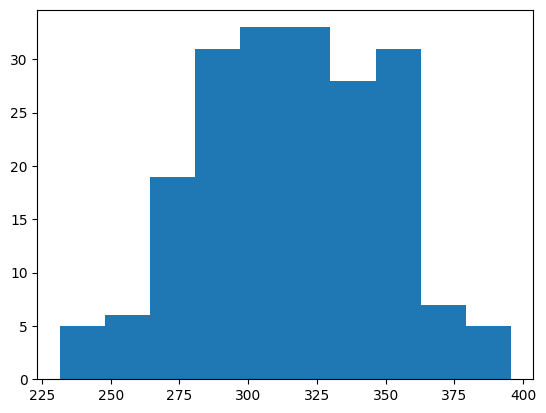

In [80]:
plt.hist(mean_intensity)
#plt.hist(np.array(mean_fcd_intensity)[np.array(mean_fcd_intensity) > 220])

(array([ 2., 10., 27., 31., 48., 28., 19., 15., 10.,  2.]),
 array([218.00704722, 240.38356343, 262.76007964, 285.13659585,
        307.51311206, 329.88962827, 352.26614448, 374.64266069,
        397.0191769 , 419.39569311, 441.77220931]),
 <BarContainer object of 10 artists>)

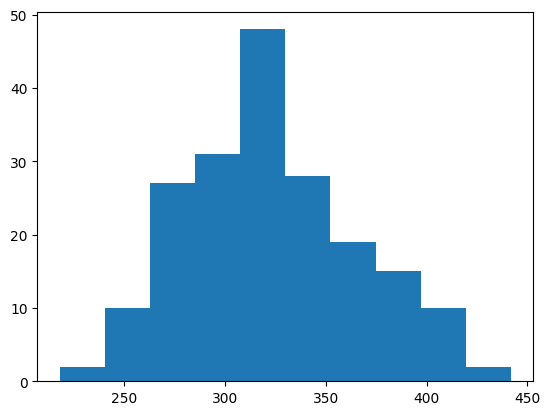

In [94]:
plt.hist(np.array([mean_fcd_intensity[i] for i in range(len(mean_fcd_intensity)) if i not in bad_inds]))

In [68]:
np.where(np.array(mean_fcd_intensity) < 230)

(array([ 48,  84, 132, 171]),)

In [133]:
mean_fcd_intensity[144]

247.25215596090294

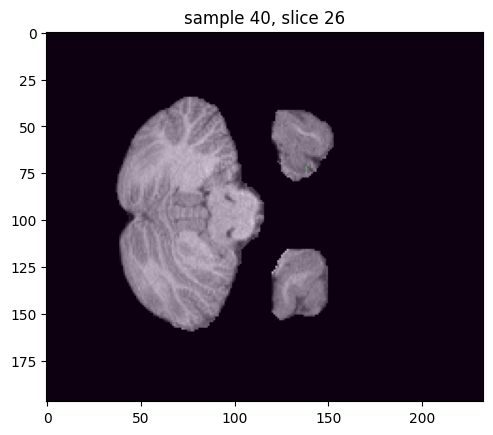

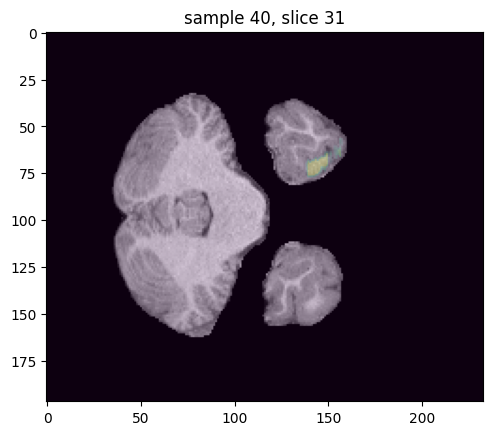

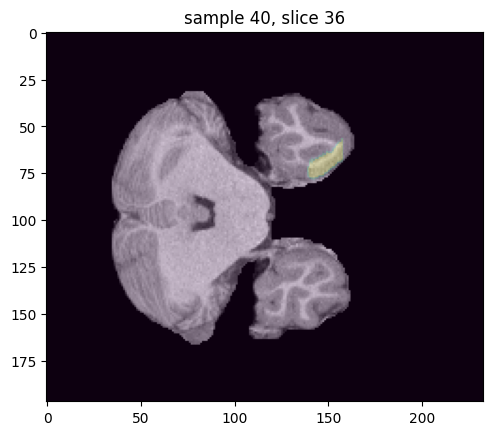

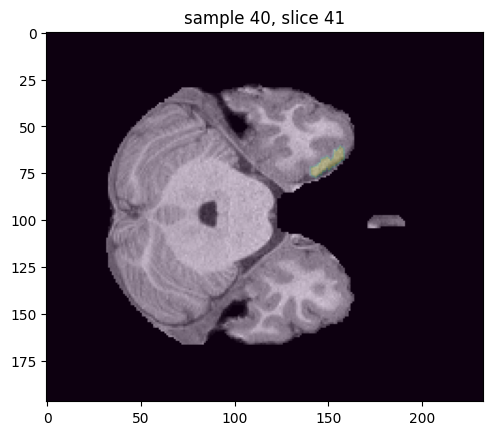

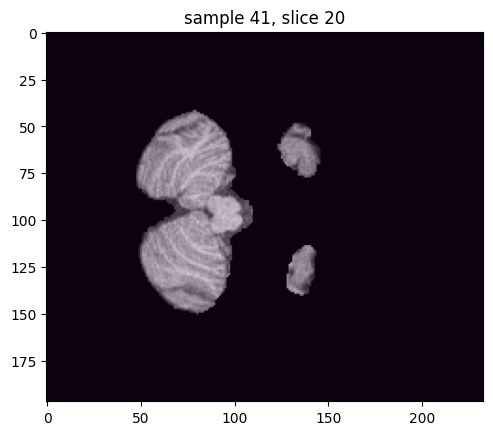

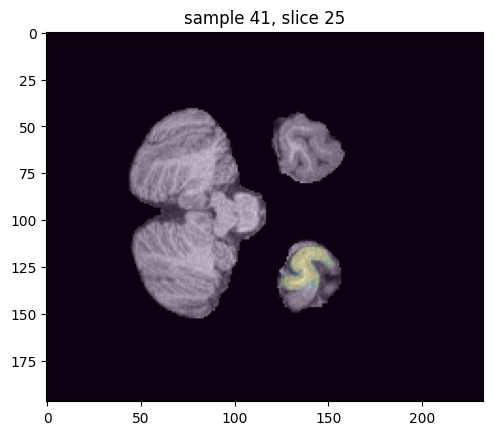

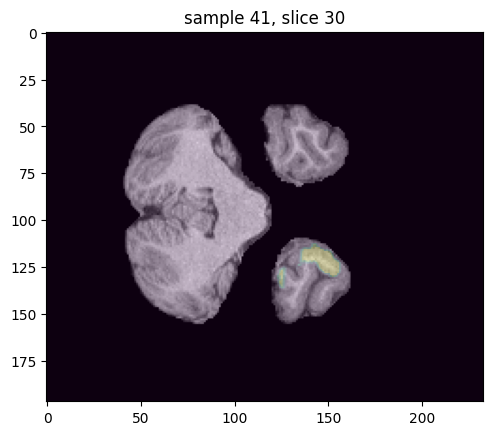

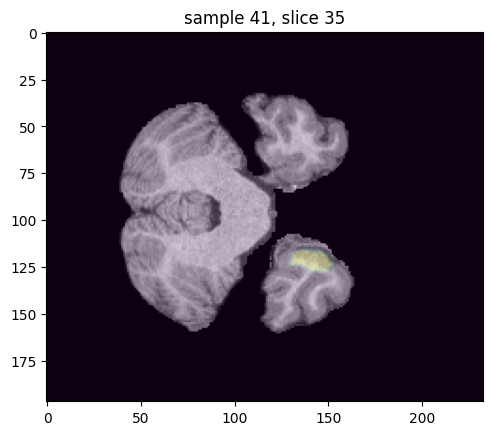

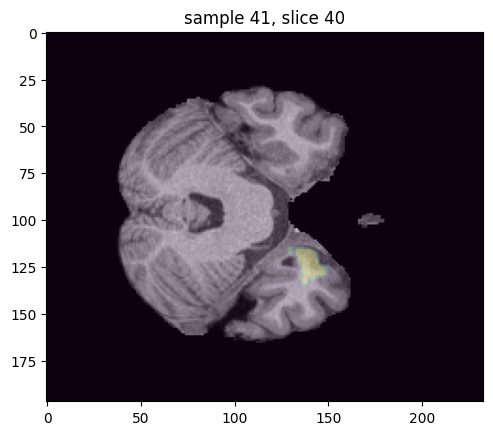

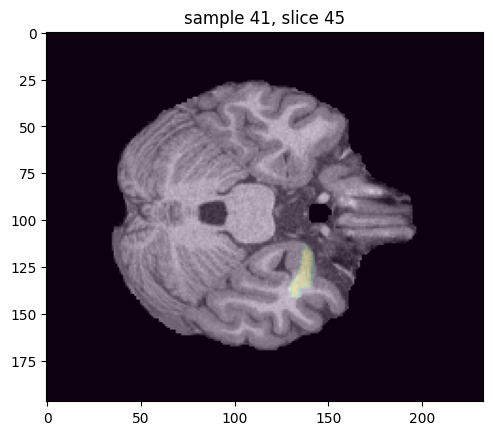

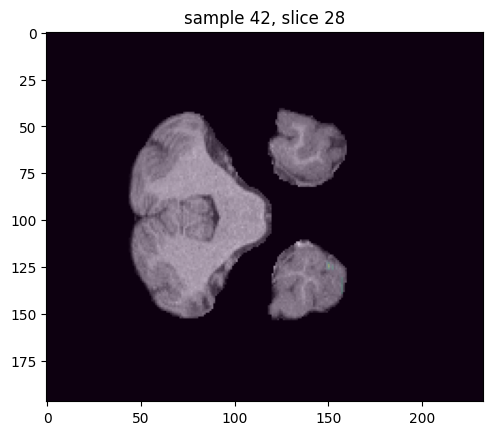

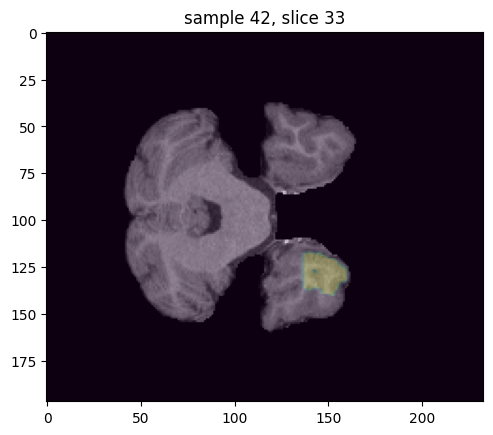

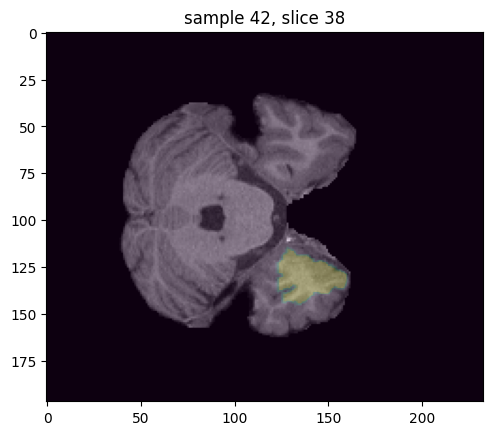

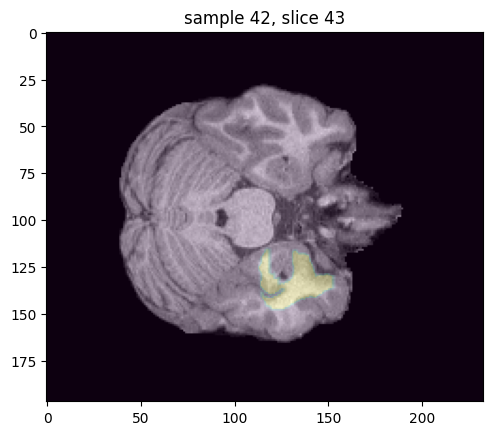

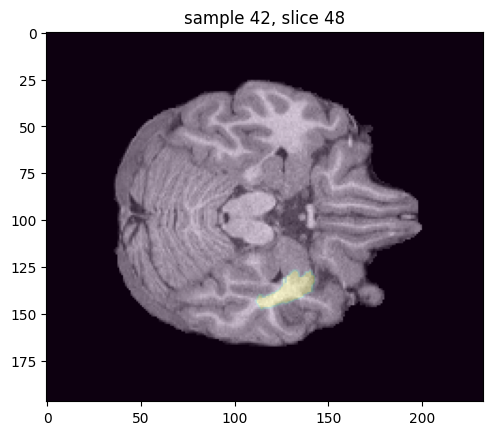

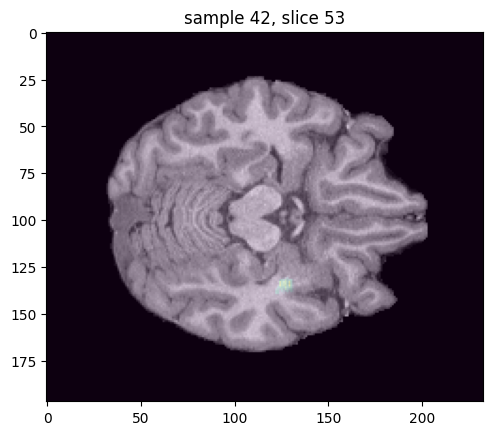

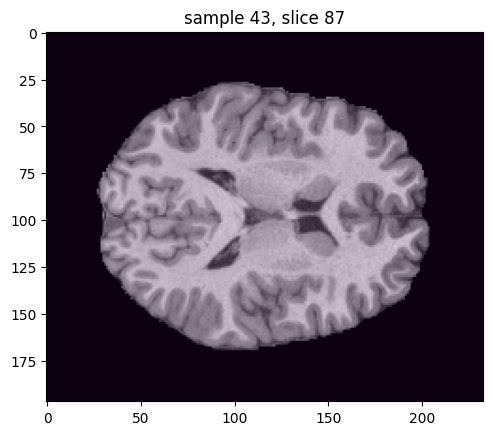

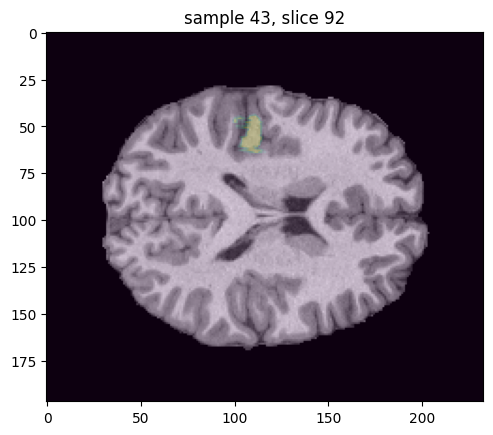

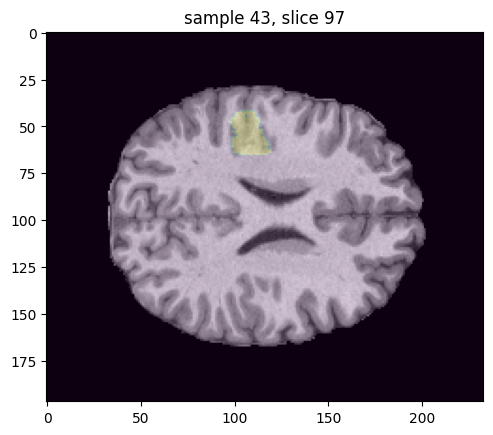

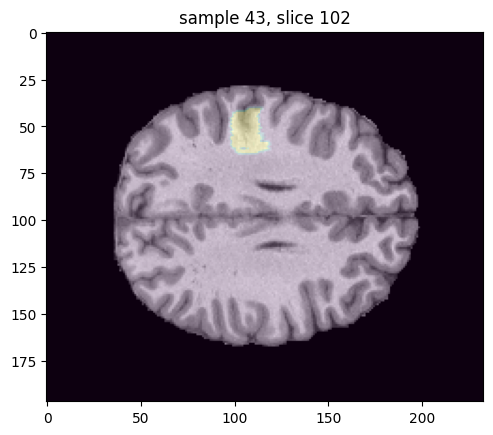

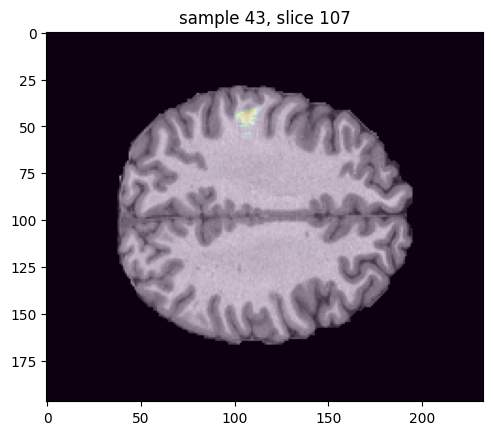

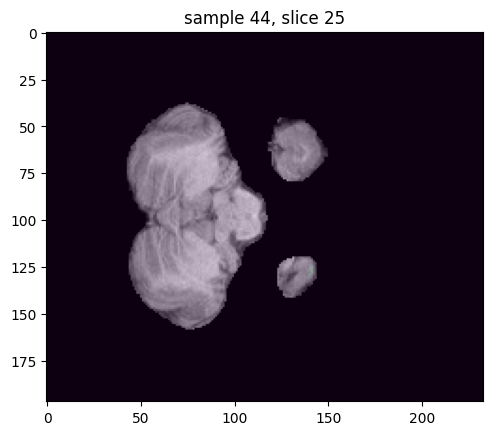

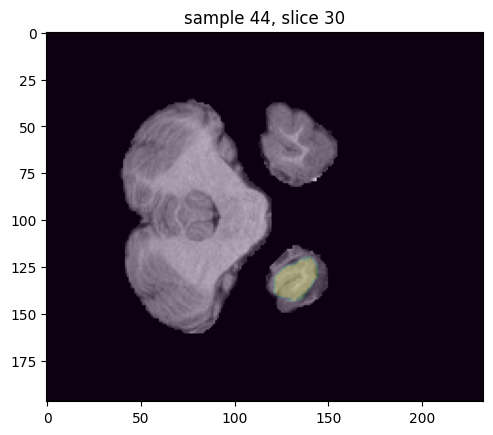

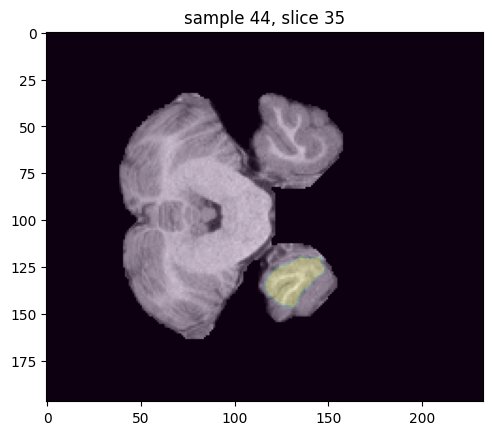

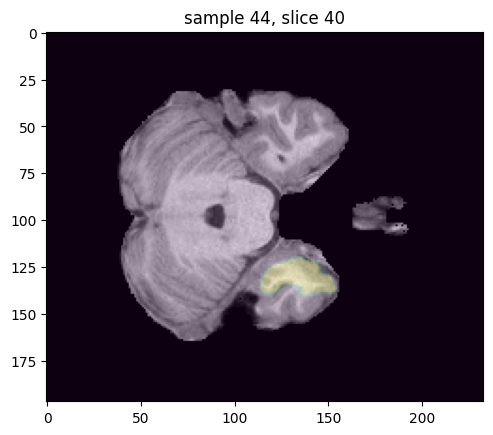

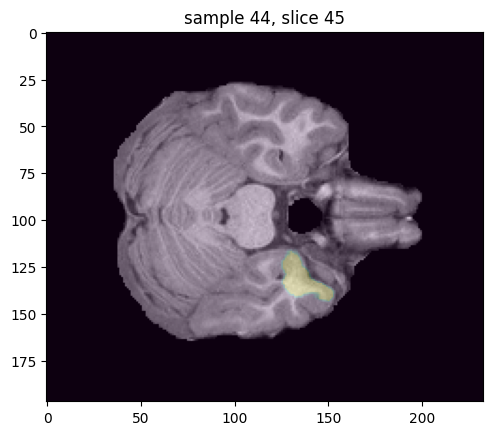

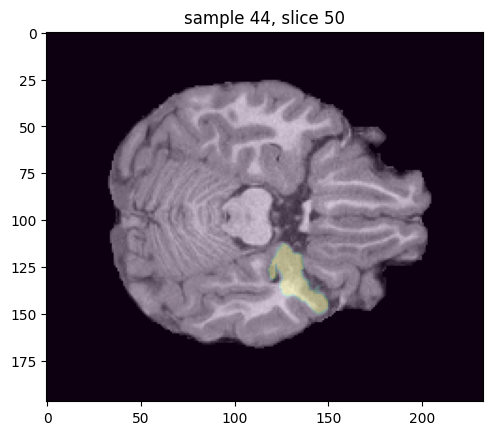

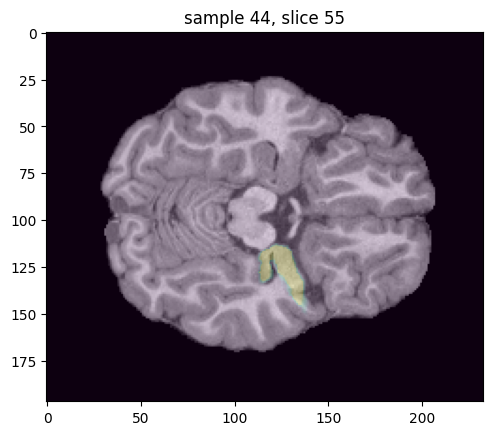

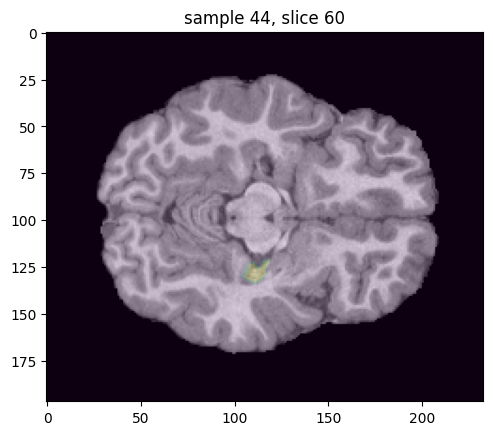

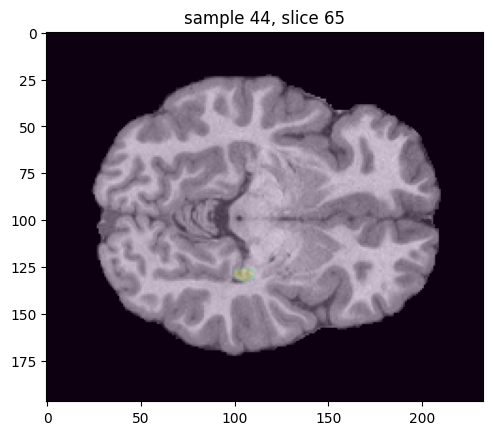

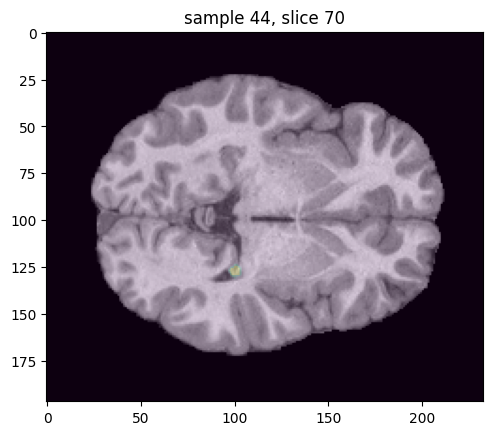

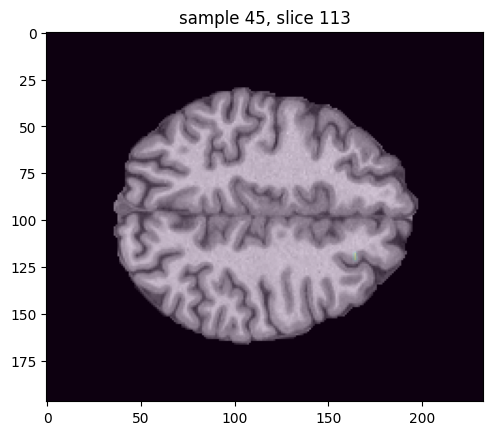

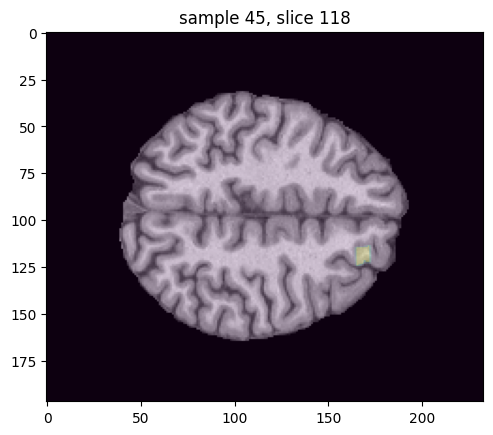

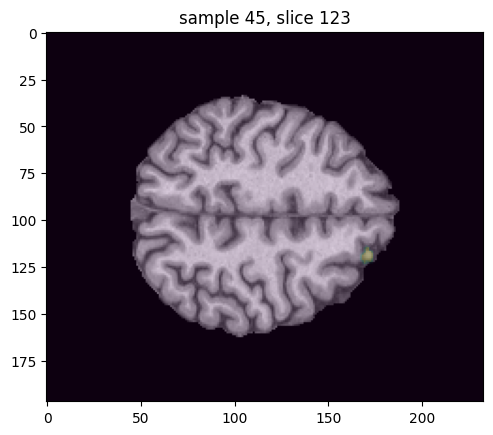

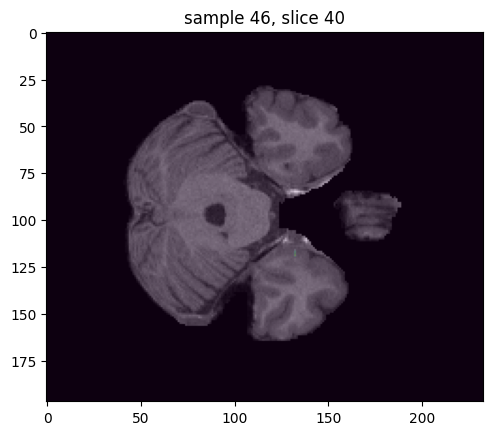

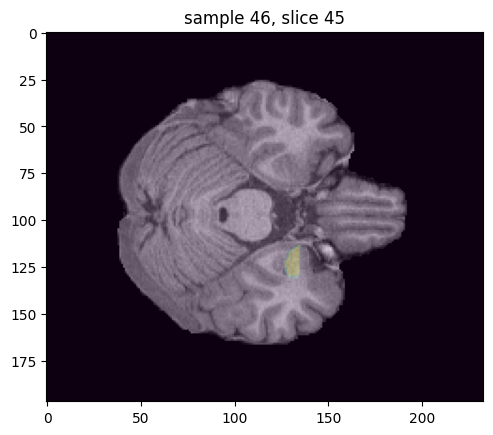

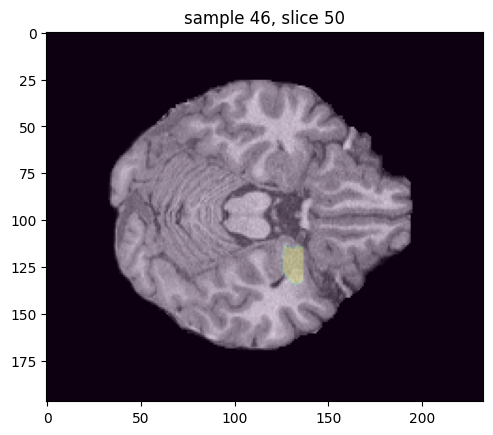

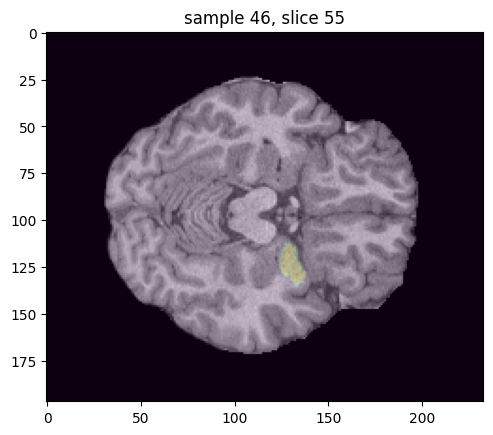

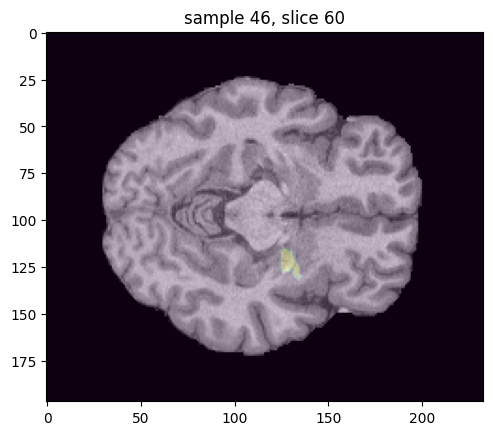

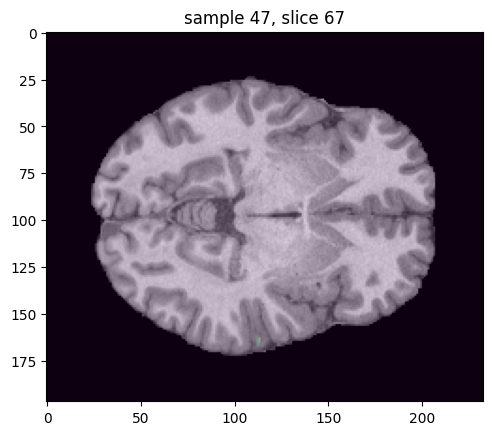

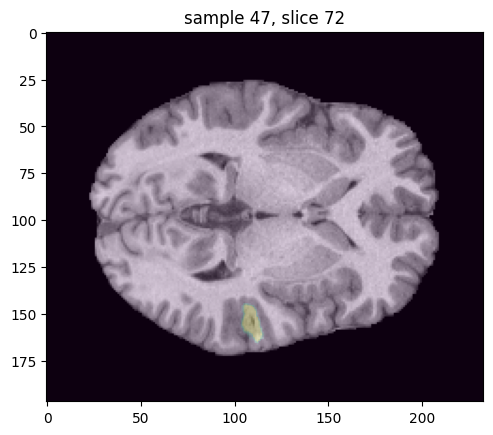

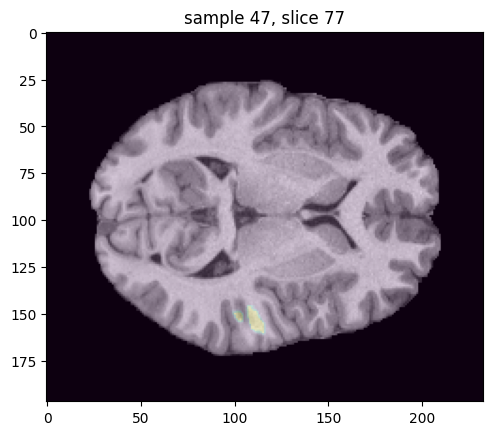

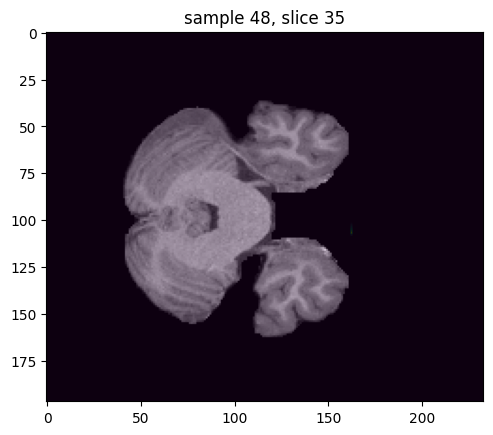

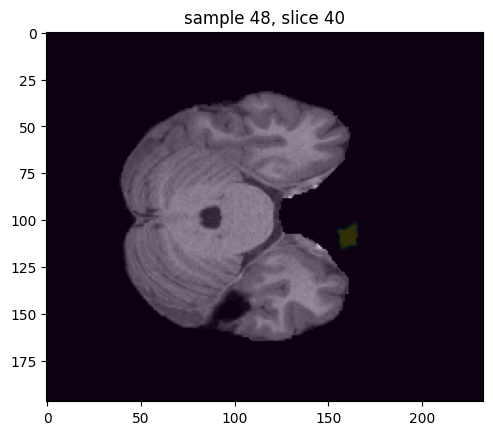

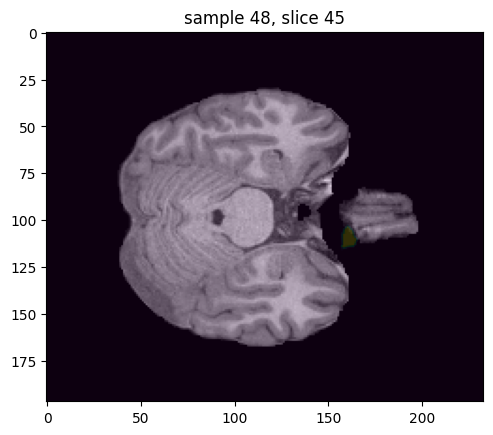

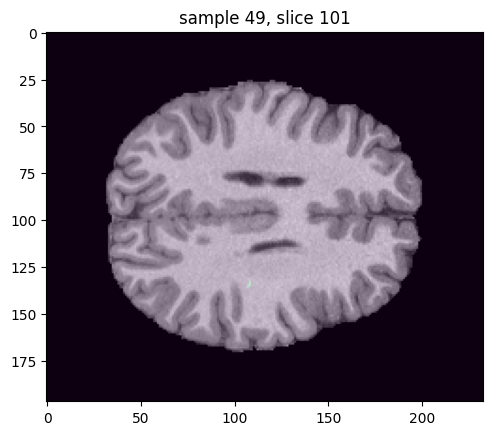

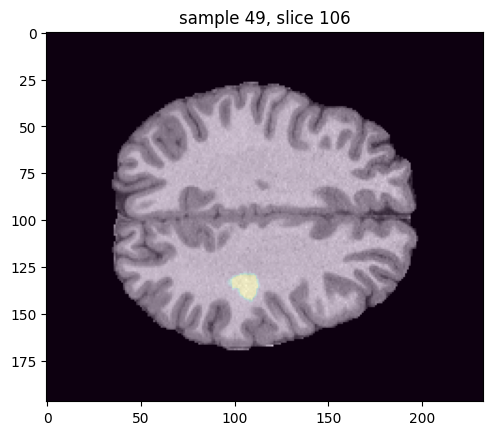

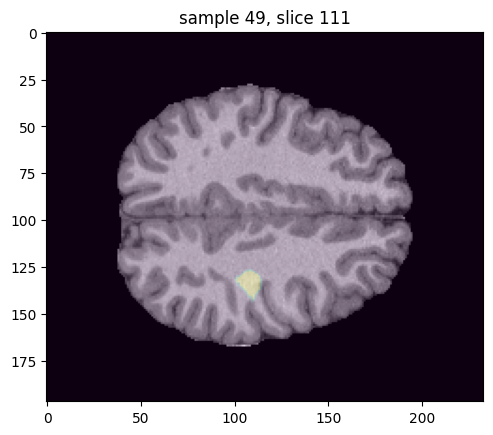

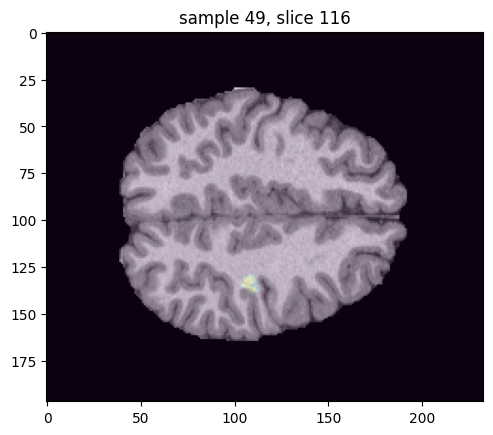

In [60]:
for idx in range(40, 50):
    sample = pathological_mri[idx]
    mri, mask = sample['mri'], sample['mask']
    mask_inds = sorted(np.where(mask.sum(axis=(0, 1)) > 0)[0])
    for i in range(mask_inds[0], mask_inds[-1], 5):
        plt.imshow(mri[:, :, i], cmap='gray')
        plt.imshow(mask[:, :, i], alpha=0.2) 
        plt.title(f'sample {idx}, slice {i}')
        plt.show()

In [40]:
pathological_mri[68]['filename']

'sub-73NS_t1_brain-final.nii.gz'

67, 68 - удаленная область \
48, 84 - разметка вне мозга \
80, 88 - две области \
99 - большая область \
72 - странное пятно \
132 - темный снимок (таких много)
171 - странный треугольник

In [132]:
for idx, sample in enumerate(pathological_mri):
    if 'n38' in sample['filename']:
        print(idx)
        break

144


In [131]:
sample = pathological_mri.getbyname('sub-n25_t1_brain-final.nii.gz')
ImageSliceViewer3D(sample['mri'], sample['mask'], cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [6]:
for sample in pathological_mri:
    filename = sample['filename']
    subj = filename.split('_')[0]
    brain_mask_filename = f"{subj}_t1_brain-final_mask.nii.gz"
    path = f"/workspace/Features/Features/prep_wf/{subj}/{brain_mask_filename}"
    !cp {path} "../data/pathological_mri/brain_mask/" 

In [4]:
brain_mask = pathological_mri[0]['brain_mask']
ImageSliceViewer3D(brain_mask, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [5]:
np.unique(brain_mask)

array([0., 1.])

In [8]:
healthy_dataset = HealthyMRIDataset('/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_mri_t1',
                                    '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/sphere_masks/masks')

In [9]:
for sample in healthy_dataset:
    filename = sample['filename']
    subj = filename.split('_')[0]
    brain_mask_filename = f"{subj}_t1_brain-final_mask.nii.gz"
    path = f"/workspace/Features/Features/prep_wf/{subj}/{brain_mask_filename}"
    !cp {path} "../data/healthy_mri_C_00/brain_mask/" 

In [10]:
len(healthy_dataset)

77

In [11]:
len(os.listdir("../data/healthy_mri_C_00/brain_mask/"))

77

100%|██████████| 77/77 [00:13<00:00,  5.80it/s]


2667.961038961039


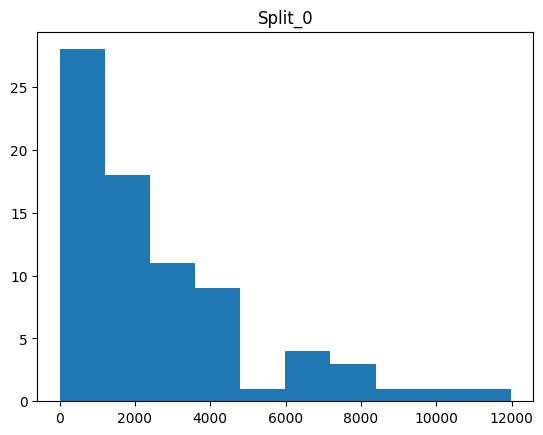

100%|██████████| 77/77 [00:13<00:00,  5.79it/s]


2834.2337662337663


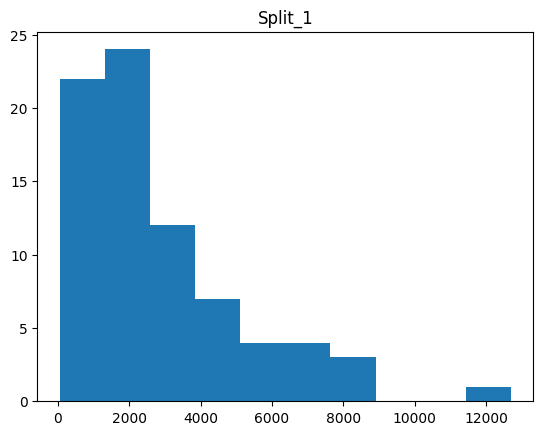

100%|██████████| 77/77 [00:13<00:00,  5.71it/s]


2756.5454545454545


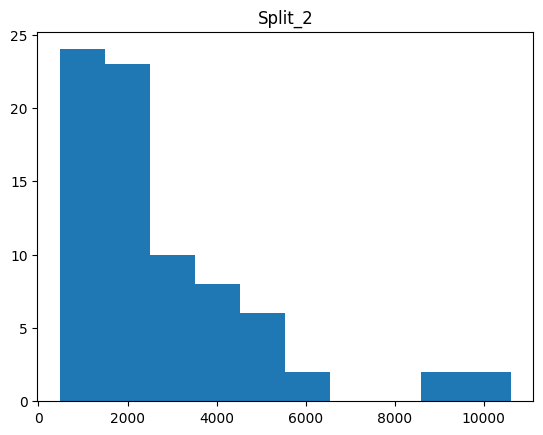

100%|██████████| 77/77 [00:13<00:00,  5.71it/s]


2797.5454545454545


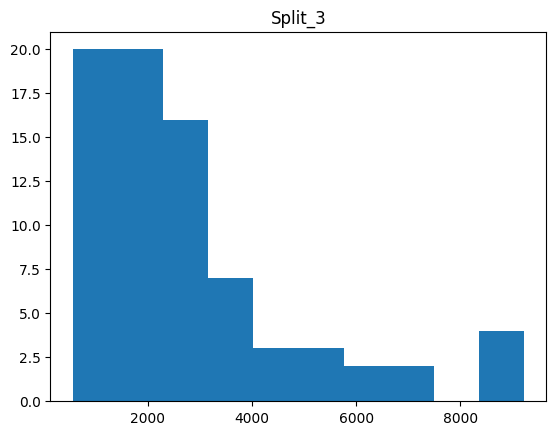

100%|██████████| 77/77 [00:13<00:00,  5.72it/s]


2294.909090909091


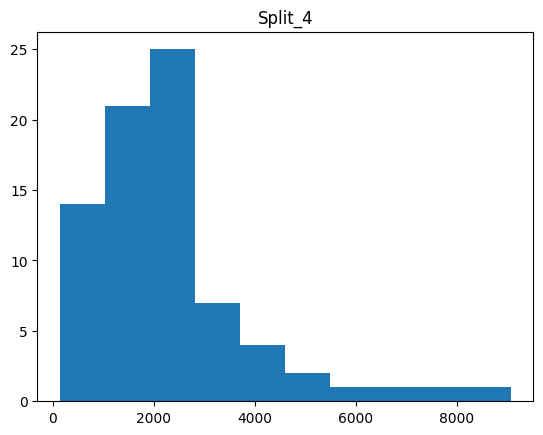

100%|██████████| 77/77 [00:13<00:00,  5.74it/s]


2406.2337662337663


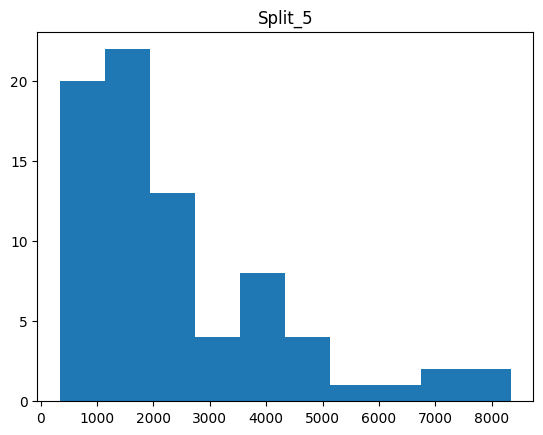

100%|██████████| 77/77 [00:13<00:00,  5.79it/s]


1477.2727272727273


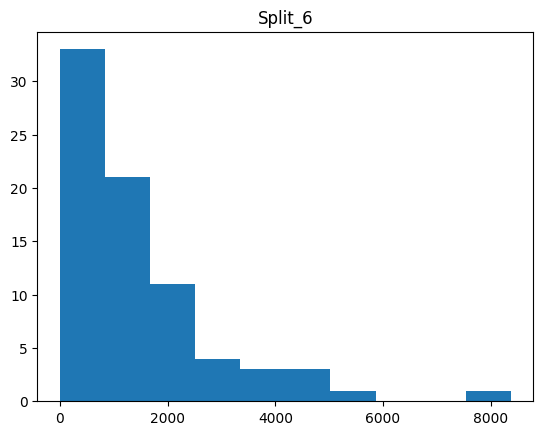

100%|██████████| 77/77 [00:13<00:00,  5.78it/s]


1835.142857142857


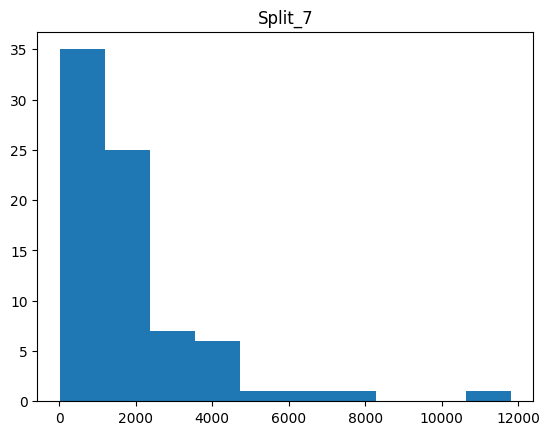

In [82]:
path = '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/3dunet_masks_right_size/masks'

for split_id in range(8):
    split_dir = f"split{split_id}/masks"
    dir_path = os.path.join(path, split_dir)
    mask_sizes = []
    for filename in tqdm(os.listdir(dir_path)):
        full_path = os.path.join(dir_path, filename)
        mask_sizes.append(nib.load(full_path).get_fdata().sum())

    plt.hist(mask_sizes)
    plt.title(f"Split_{split_id}")
    print(np.mean(mask_sizes))
    plt.show()

In [151]:
healthy_dataset = HealthyMRIDataset('/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_mri_t1',
                                    '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/3dunet_masks_new/masks/split0/masks',
                                    '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/3dunet_masks_new/patch_masks/split0')

In [34]:
len(os.listdir(path + "/split0/masks"))

77

In [100]:
id = 23
mri, mask, patch_mask = healthy_dataset[id]['mri'], healthy_dataset[id]['mask'],  healthy_dataset[id]['patch_mask']

In [15]:
np.stack(np.where(mask > 0), axis=0).shape

(3, 532)

In [148]:
source_dir = '/workspace/Features/Features/generated_mri/i2sb/3dunet_masks_new'
dest_dir = '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/3dunet_masks_new/masks'

for split_id in range(8):
    dir = os.path.join(dest_dir, f"split{split_id}/masks")
    for filename in os.listdir(dir):
        new_filename = filename[:-len('.nii.gz')] + "-mask.nii.gz"
        file_path = os.path.join(dir, filename)
        new_file_path = os.path.join(dir, new_filename)
        !mv {file_path} {new_file_path}

In [149]:
def obtain_patch_mask(mask):
    indices = np.stack(np.where(mask > 0), axis=0)
    medians = np.median(indices, axis=1).astype(np.int32)
    start = medians - 20
    end = medians + 20
    patch_mask = np.zeros_like(mask)
    patch_mask[start[0]:end[0], start[1]:end[1], start[2]:end[2]] = 1.0

    return patch_mask

In [62]:
patch_mask = obtain_patch_mask(mask)

In [101]:
ImageSliceViewer3D(mri, mask, cmap='gray', mask_intensity=0.2)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [161]:
import warnings
warnings.filterwarnings("error")
from tqdm import tqdm

mask_path = '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/3dunet_masks_new/masks'
patch_mask_path = '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/3dunet_masks_new/patch_masks'

for split_id in tqdm(range(8)):
    split_dir = f"split{split_id}/masks"
    mask_dir = os.path.join(mask_path, split_dir)
    patch_mask_dir = patch_mask_path + f"/split{split_id}"
    !mkdir {patch_mask_dir}
    for mask_filename in os.listdir(mask_dir):
        full_mask_path = os.path.join(mask_dir, mask_filename)
        mask = nib.load(full_mask_path).get_fdata()
        
        try:
            patch_mask = obtain_patch_mask(mask)

            if not np.all(patch_mask[mask > 0] == 1.0):
                print(np.sum(patch_mask[mask > 0] != 1.0))
                raise RuntimeWarning
                
            patch_mask_filename = mask_filename[:-len("-mask.nii.gz")] + "-patch-mask.nii.gz"
            full_patch_mask_path = os.path.join(patch_mask_dir, patch_mask_filename)
            patch_mask_nib = nib.Nifti1Image(patch_mask, affine=np.eye(4))
            nib.save(patch_mask_nib, full_patch_mask_path)
        except RuntimeWarning:
            print(split_id, mask_filename)

6


In [158]:
sample = healthy_dataset[20]

In [160]:
ImageSliceViewer3D(sample['mask'], sample['patch_mask'], cmap='gray', mask_intensity=0.2)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [142]:
splits = np.load('/workspace/MRI-inpainting-project/data/train_patches_v3/stratified_8_cv_filtered.npy', allow_pickle=True)
print([len(split['train']) for split in splits])
print([len(split['val']) for split in splits])
splits

[143, 146, 143, 144, 145, 144, 145, 145]
[22, 19, 22, 21, 20, 21, 20, 20]


array([{'train': array(['9', '93', '33', '48', '53', '46', '43', '49', '36', 'n3', 'n69',
              'G324', 'n68', 'n35', 'G015', 'n13', 'n88', 'n50', 'n82', 'n41',
              '37', '42', '17', '29', '95NS', '65NS', '10', '90', '76', 'n75',
              'G177', 'n61', 'n18', 'n37', 'n54', 'n42', 'n19', 'n22', 'n83',
              'n25', '88NS', '30', '60', '19', '16', '8', '59', '3', '58', 'n11',
              'n79', 'n5', 'G061', 'n31', 'n73', 'n62', 'n43', 'n78', 'n56',
              'n65', 'n59', '32', '35', '44', '11', '41', '62NS', '50', '97',
              'n26', 'n67', 'G409', 'n66', 'n70', 'G180', 'n77', 'n64', 'G368',
              'n55', 'n20', 'n32', '25', '98', '54', '83', '18', '1', '70NS',
              '5', '2', 'n58', 'n47', 'n57', 'n46', 'n39', 'G256', 'G044', 'n36',
              'n23', 'n34', 'n51', 'G081', '22', '84', '45', '82', '80NS', '20',
              '27', '86NS', '57', '51', 'n12', 'G184', 'n60', 'n7', 'G371',
              'n72', 'n45', 'n9', 'n21',

67, 68 - удаленная область
48, 84 - разметка вне мозга
80, 88 - две области
99 - большая область
72 - странное пятно
132 - темный снимок (таких много) 
171 - странный треугольник

In [108]:
bad_inds = [67, 68, 48, 84, 72, 171]
bad_filenames = [pathological_mri[idx]['filename'] for idx in bad_inds]
bad_files_nicks = [filename.split('-')[1].split('_')[0] for filename in bad_filenames]

In [136]:
bad_files_nicks = ['72NS', '73NS', '55', '89', '77NS', 'n63', 'n25', 'n38']

In [137]:
for id in range(len(splits)):
    mask = []
    for name in splits[id]['train']:
        mask.append(name not in bad_files_nicks)
    splits[id]['train'] = splits[id]['train'][np.array(mask)]
    val_mask = []
    for name in splits[id]['val']:
        val_mask.append(name not in bad_files_nicks)
    splits[id]['val'] = splits[id]['val'][np.array(val_mask)]

In [138]:
print([len(split['train']) for split in splits])
print([len(split['val']) for split in splits])
splits

[142, 144, 141, 142, 143, 142, 144, 143]
[21, 19, 22, 21, 20, 21, 19, 20]


array([{'train': array(['9', '93', '33', '48', '53', '46', '43', '49', '36', 'n3', 'n69',
              'G324', 'n68', 'n35', 'G015', 'n13', 'n88', 'n50', 'n82', 'n41',
              '37', '42', '17', '29', '95NS', '65NS', '10', '90', '76', 'n75',
              'G177', 'n61', 'n18', 'n37', 'n54', 'n42', 'n19', 'n22', 'n83',
              '88NS', '30', '60', '19', '16', '8', '59', '3', '58', 'n11', 'n79',
              'n5', 'G061', 'n31', 'n73', 'n62', 'n43', 'n78', 'n56', 'n65',
              'n59', '32', '35', '44', '11', '41', '62NS', '50', '97', 'n26',
              'n67', 'G409', 'n66', 'n70', 'G180', 'n77', 'n64', 'G368', 'n55',
              'n20', 'n32', '25', '98', '54', '83', '18', '1', '70NS', '5', '2',
              'n58', 'n47', 'n57', 'n46', 'n39', 'G256', 'G044', 'n36', 'n23',
              'n34', 'n51', 'G081', '22', '84', '45', '82', '80NS', '20', '27',
              '86NS', '57', '51', 'n12', 'G184', 'n60', 'n7', 'G371', 'n72',
              'n45', 'n9', 'n21', 'G294'

In [139]:
np.save('/workspace/MRI-inpainting-project/data/train_patches_v3/stratified_8_cv_filtered_2.npy', splits, allow_pickle=True)

In [141]:
splits_filtered = np.load('/workspace/MRI-inpainting-project/data/train_patches_v3/stratified_8_cv_filtered_2.npy', allow_pickle=True)
print([len(split['val']) for split in splits_filtered])

[21, 19, 22, 21, 20, 21, 19, 20]


In [146]:
len(splits_filtered)

8

In [143]:
sample_split = np.array([{'train': np.array(['n13'])}])

In [144]:
np.save('/workspace/MRI-inpainting-project/data/train_patches_v3/stratified_8_cv_sample.npy', sample_split, allow_pickle=True)

In [4]:
healthy_dataset = HealthyMRIDataset('/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_mri_t1',
                                    '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/sphere_masks/masks')

generated_mri = PathologicalMRIDataset('/workspace/Features/Features/generated_mri/i2sb/3dunet_masks_new/split0')

In [5]:
generated_mri[0]

FileNotFoundError: No such file or no access: '/workspace/Features/Features/generated_mri/i2sb/3dunet_masks_new/split0/label/00002.nii.gz'